### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import csv as csv
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import statsmodels
import scipy.stats as stats
import statsmodels.stats.proportion as smpt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier

In [2]:
df=pd.read_csv('application_train.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
pd.set_option('display.max_columns',None)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### EDA

In [4]:
df["DAYS_EMPLOYED"].replace(365243,np.nan,inplace=True)
df["DAYS_EMPLOYED"].median()
df["DAYS_EMPLOYED"].replace(to_replace = np.nan,value = df["DAYS_EMPLOYED"].median(), inplace=True)
df['YEARS_EMPLOYED'] = -df['DAYS_EMPLOYED']/365

In [5]:
df['AGE']  = -df['DAYS_BIRTH']/365

In [6]:
df['DAYS_ID_PUBLISH'] = -df['DAYS_ID_PUBLISH']
df['DAYS_REGISTRATION'] = -df['DAYS_REGISTRATION']
df["DAYS_LAST_PHONE_CHANGE"]=-df["DAYS_LAST_PHONE_CHANGE"]

In [7]:
df.drop(['DAYS_EMPLOYED',"DAYS_BIRTH"],axis=1,inplace=True)

In [8]:
df['NAME_TYPE_SUITE'].replace(to_replace = np.nan,value = "Unaccompanied", inplace=True)
df['OCCUPATION_TYPE'].replace(to_replace = np.nan,value = "Laborers", inplace=True)
df['FONDKAPREMONT_MODE'].replace(to_replace = np.nan,value = "reg oper account", inplace=True)
df['HOUSETYPE_MODE'].replace(to_replace = np.nan,value = "block of flats", inplace=True)
df['WALLSMATERIAL_MODE'].replace(to_replace = np.nan,value = "Panel", inplace=True)
df['EMERGENCYSTATE_MODE'].replace(to_replace = np.nan,value = "No", inplace=True)

In [9]:
df['CODE_GENDER'].replace(to_replace='XNA',value='F',inplace=True)
df['NAME_FAMILY_STATUS'].replace(to_replace='Unknown',value='Married',inplace=True)
df['NAME_INCOME_TYPE'].replace(to_replace='Maternity leave',value='Working',inplace=True)

In [10]:
df= df.fillna(df.median()) 

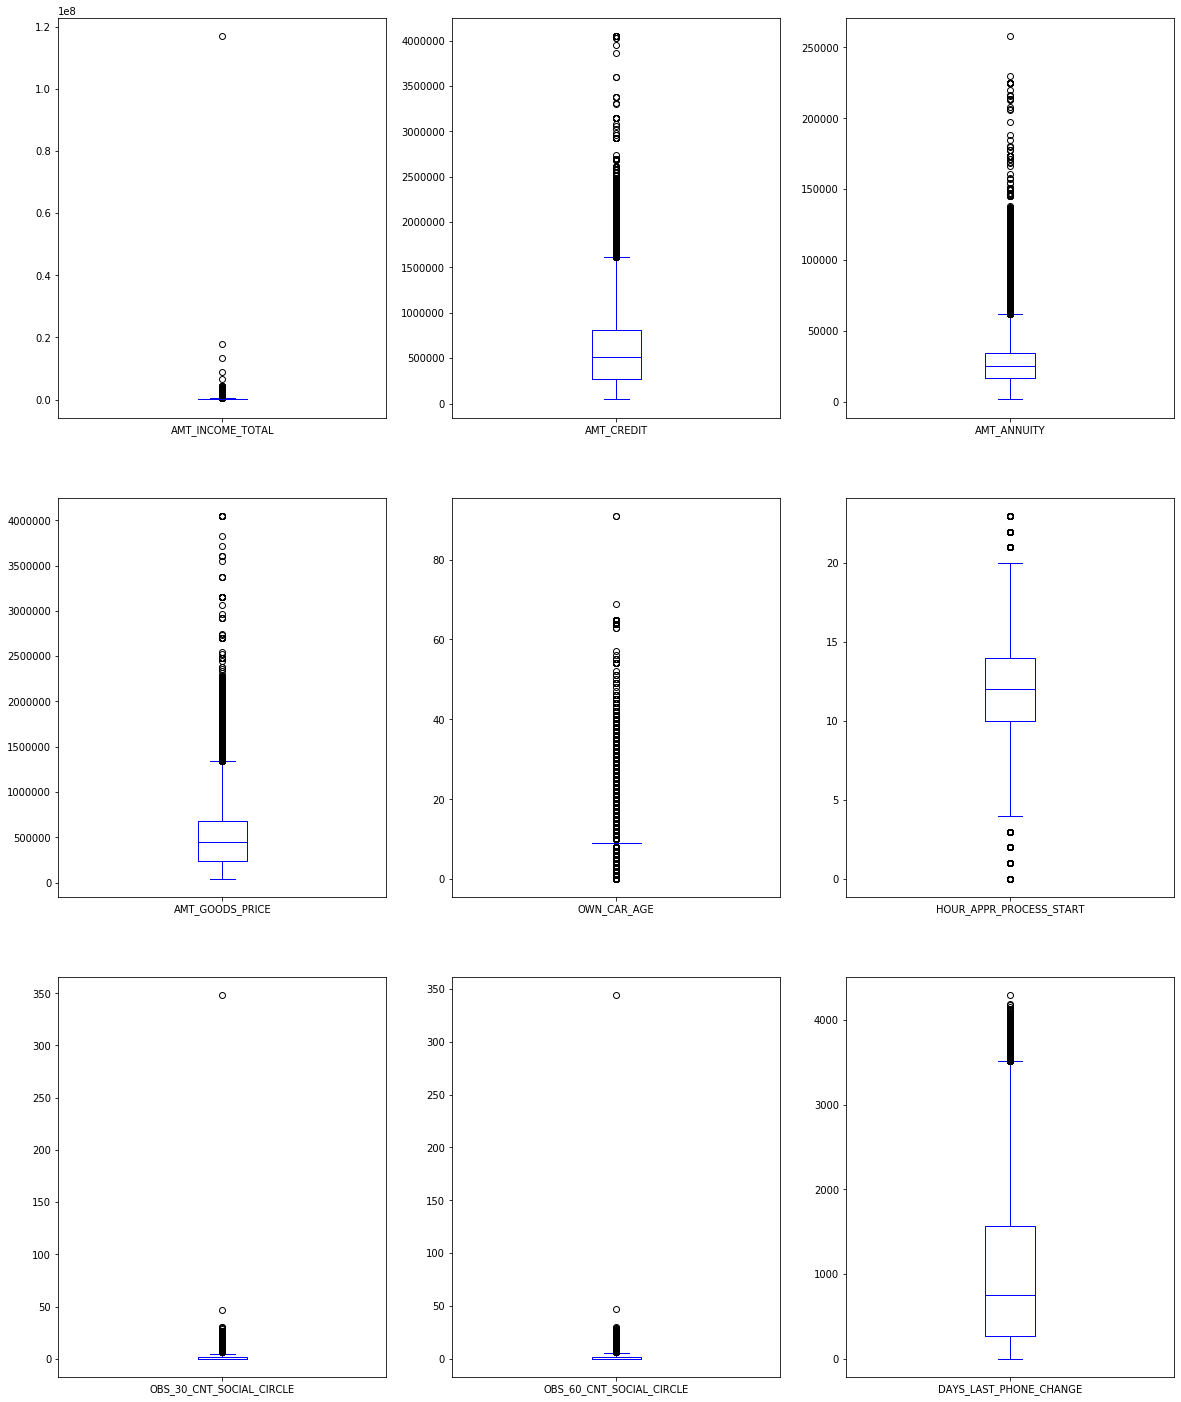

In [11]:
df[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","OWN_CAR_AGE","HOUR_APPR_PROCESS_START","OBS_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DAYS_LAST_PHONE_CHANGE"]].plot(kind= 'box' ,layout=(3,3),subplots=True, sharex=False, sharey=False, figsize=(20,25),color='blue')
plt.show()

In [12]:
df[df['AMT_INCOME_TOTAL']==117000000.0]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_EMPLOYED,AGE
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,6762.0,3643,9.0,1,1,0,1,0,0,Laborers,3.0,2,2,TUESDAY,14,0,0,0,0,0,0,Business Entity Type 3,0.460809,0.113161,0.145543,0.1031,0.0947,0.9791,0.7552,0.0211,0.0,0.2069,0.1667,0.2083,0.0688,0.0756,0.0615,0.0,0.0036,0.105,0.0983,0.9791,0.7648,0.019,0.0,0.2069,0.1667,0.2083,0.0704,0.0771,0.0641,0.0,0.0011,0.1041,0.0947,0.9791,0.7585,0.0208,0.0,0.2069,0.1667,0.2083,0.07,0.0761,0.0626,0.0,0.0031,reg oper account,block of flats,0.0715,"Stone, brick",No,0.0,0.0,0.0,0.0,-0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2.526027,34.561644


In [13]:
a=df[df['AMT_INCOME_TOTAL']==117000000.0].index

In [14]:
df.drop(a,inplace=True)

In [15]:
df['OBS_30_CNT_SOCIAL_CIRCLE'].max()

348.0

In [16]:
df['OBS_60_CNT_SOCIAL_CIRCLE'].max()

344.0

In [17]:
b=df[df['OBS_30_CNT_SOCIAL_CIRCLE']==348].index

In [18]:
df.drop(b,inplace=True)

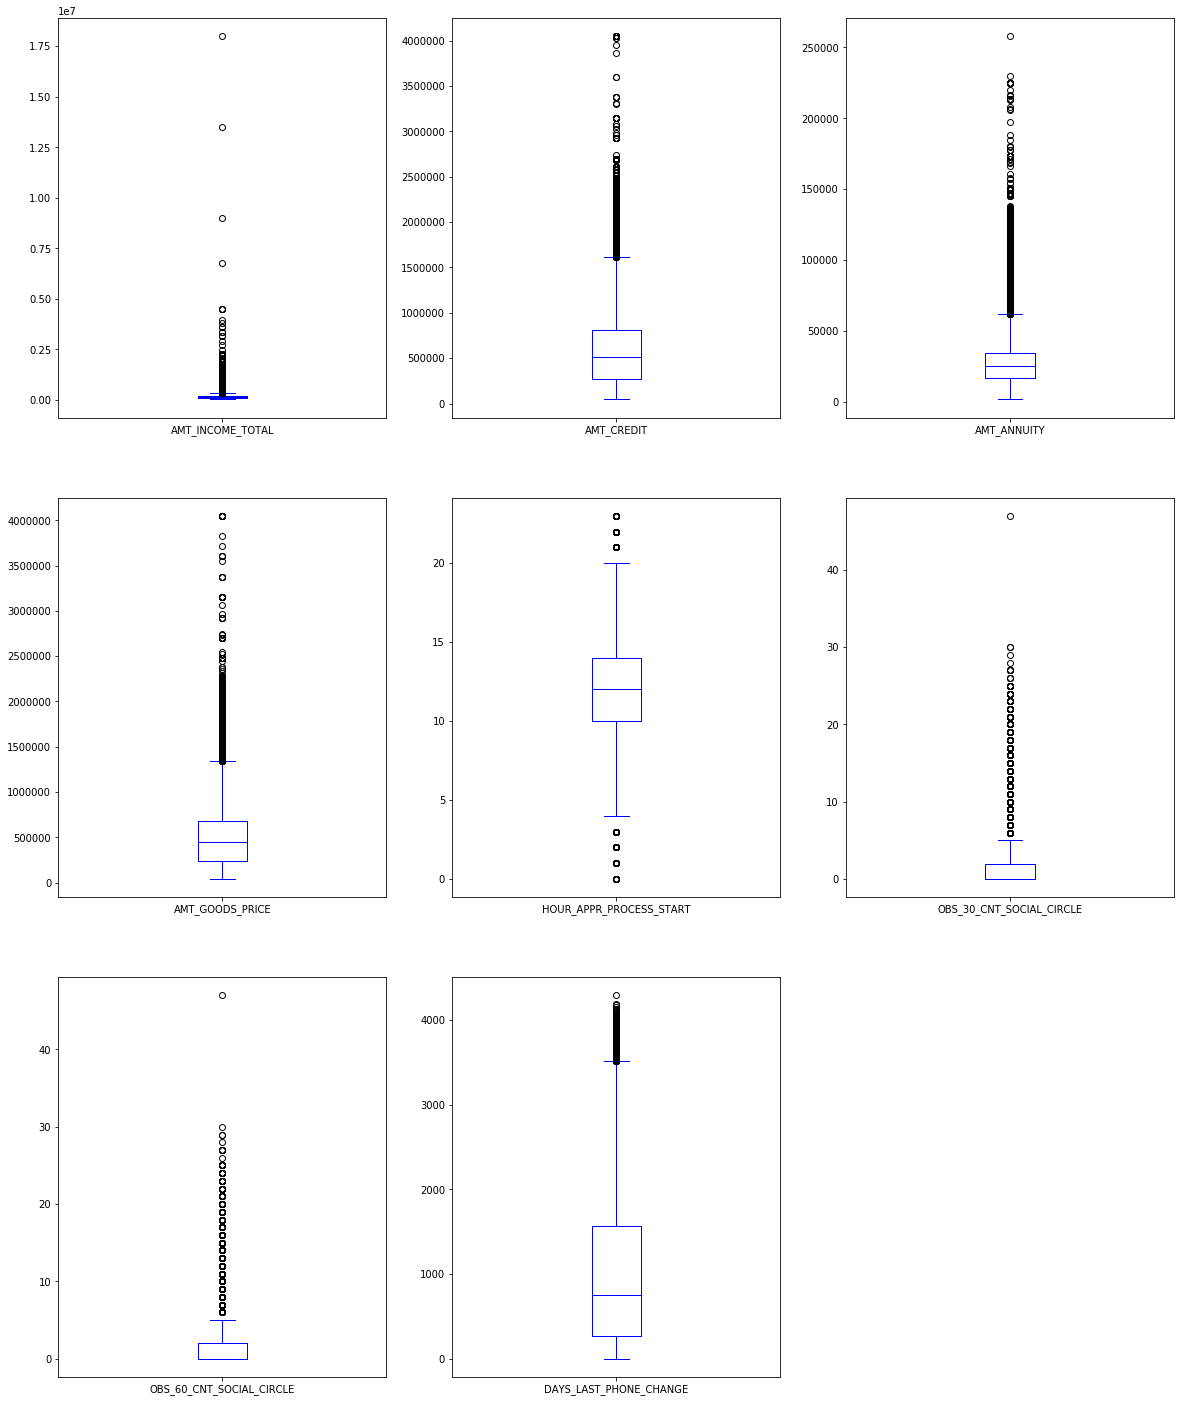

In [19]:
df[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","HOUR_APPR_PROCESS_START","OBS_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DAYS_LAST_PHONE_CHANGE"]].plot(kind= 'box' ,layout=(3,3),subplots=True, sharex=False, sharey=False, figsize=(20,25),color='blue')
plt.show()

In [20]:
def cap_outliers(series, iqr_threshold=1.5, verbose=True):
    '''Caps outliers to closest existing value within threshold (IQR).'''
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lbound = Q1 - iqr_threshold * IQR
    ubound = Q3 + iqr_threshold * IQR

    outliers = (series < lbound) | (series > ubound)

    series = series.copy()
    series.loc[series < lbound] = lbound
    series.loc[series > ubound] = ubound

    # For comparison purposes.
    if verbose:
            print('\n'.join(
                ['Capping outliers by the IQR method:',
                 f'   IQR threshold: {iqr_threshold}',
                 f'   Lower bound: {lbound}',
                 f'   Upper bound: {ubound}\n']))

    return series

In [21]:
columns_box=df[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","HOUR_APPR_PROCESS_START","OBS_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DAYS_LAST_PHONE_CHANGE"]]

In [22]:
for i in columns_box.columns:
    print("Outlier Treatment for",i)
    df[i]=cap_outliers(df[i])

Outlier Treatment for AMT_INCOME_TOTAL
Capping outliers by the IQR method:
   IQR threshold: 1.5
   Lower bound: -22500.0
   Upper bound: 337500.0

Outlier Treatment for AMT_CREDIT
Capping outliers by the IQR method:
   IQR threshold: 1.5
   Lower bound: -537975.0
   Upper bound: 1616625.0

Outlier Treatment for AMT_ANNUITY
Capping outliers by the IQR method:
   IQR threshold: 1.5
   Lower bound: -10584.0
   Upper bound: 61704.0

Outlier Treatment for AMT_GOODS_PRICE
Capping outliers by the IQR method:
   IQR threshold: 1.5
   Lower bound: -423000.0
   Upper bound: 1341000.0

Outlier Treatment for HOUR_APPR_PROCESS_START
Capping outliers by the IQR method:
   IQR threshold: 1.5
   Lower bound: 4.0
   Upper bound: 20.0

Outlier Treatment for OBS_30_CNT_SOCIAL_CIRCLE
Capping outliers by the IQR method:
   IQR threshold: 1.5
   Lower bound: -3.0
   Upper bound: 5.0

Outlier Treatment for OBS_60_CNT_SOCIAL_CIRCLE
Capping outliers by the IQR method:
   IQR threshold: 1.5
   Lower bound: -3.

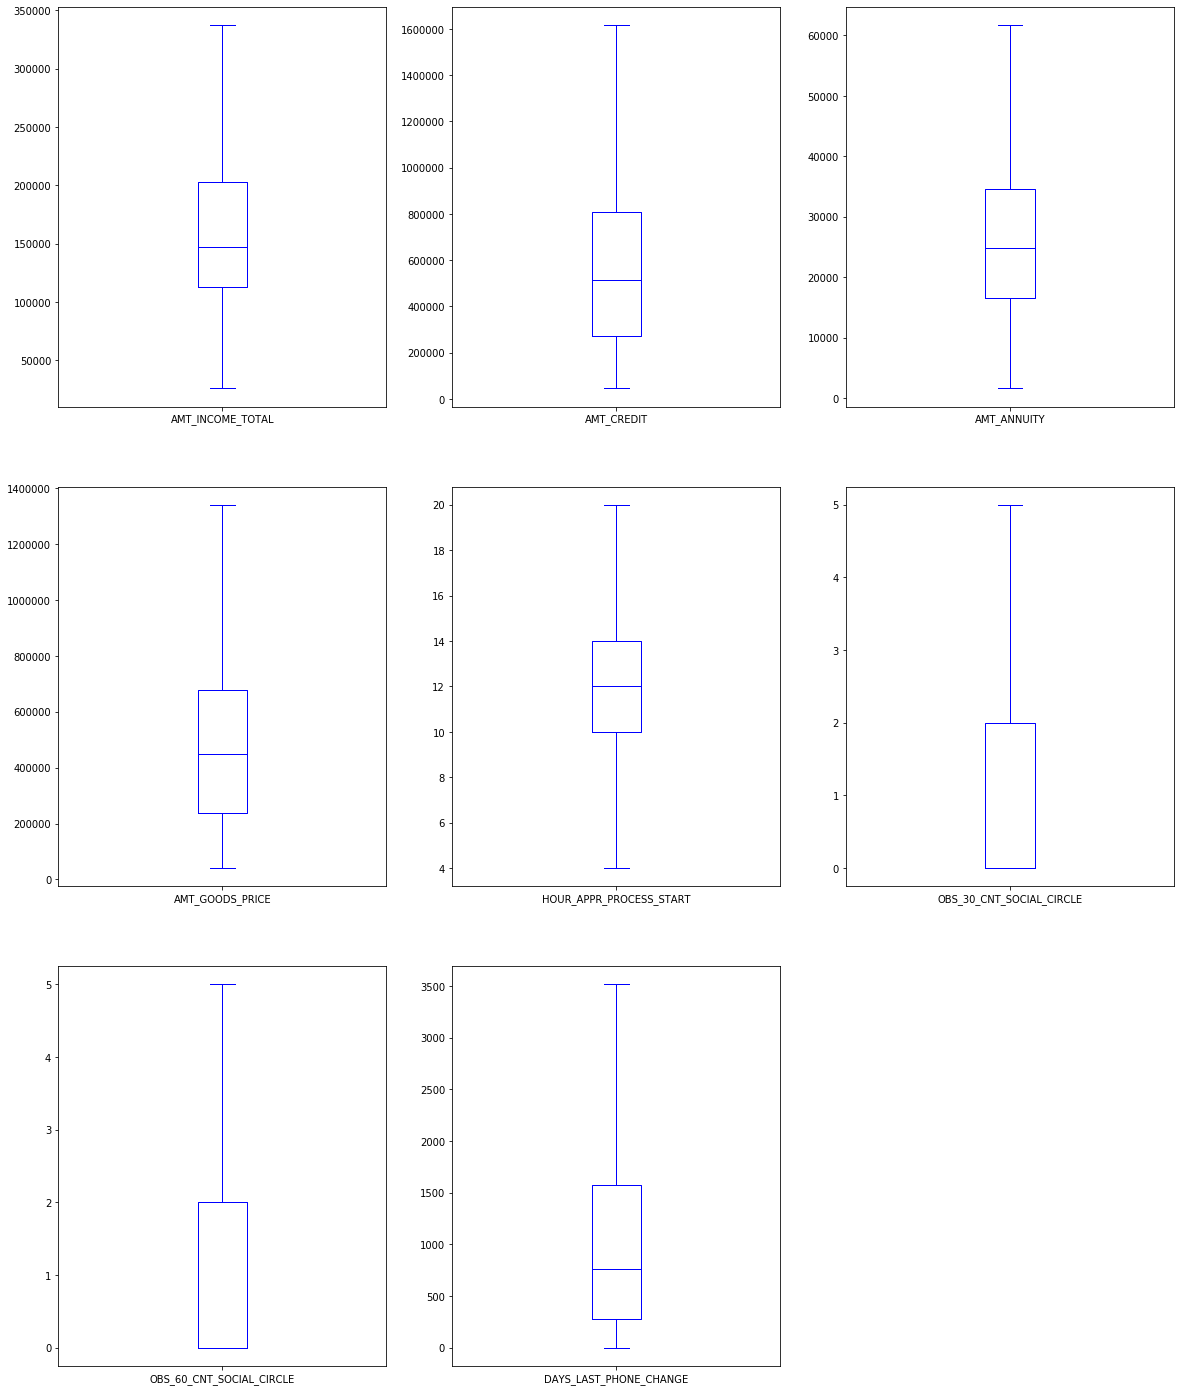

In [23]:
df[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","HOUR_APPR_PROCESS_START","OBS_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DAYS_LAST_PHONE_CHANGE"]].plot(kind= 'box' ,layout=(3,3),subplots=True, sharex=False, sharey=False, figsize=(20,25),color='blue')
plt.show()

In [24]:
df['NAME_EDUCATION_TYPE'] = df["NAME_EDUCATION_TYPE"].replace(
                                    {"Lower secondary"                 :1,
                                     "Secondary / secondary special"   :2,
                                     "Incomplete higher"               :3,
                                     "Higher education"                :4,
                                     "Academic degree"                 :5
})

In [25]:
df['documents'] =  np.sum(df[['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']] , axis = 1)

In [26]:
df['enquiries'] =  np.sum(df.iloc[:,114:120] , axis = 1)

In [27]:
df['phone'] =  np.sum(df.iloc[:,20:23] , axis = 1)

In [28]:
df.drop(['FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'],axis =1, inplace = True)

In [29]:
df_new=pd.get_dummies(data=df,columns=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE','NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START',
        'FONDKAPREMONT_MODE','HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE','ORGANIZATION_TYPE','OCCUPATION_TYPE'],drop_first=True)

In [30]:
df_new.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,YEARS_EMPLOYED,AGE,documents,enquiries,phone,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANI

In [31]:
df_new.shape

(307509, 198)

### SMOTE

In [32]:
X = df_new.drop(['TARGET','SK_ID_CURR'],axis =1)
y= df_new['TARGET']

In [33]:
print("Before OverSampling, counts of label '1':",np.sum(y == 1))
print("Before OverSampling, counts of label '0':",np.sum(y == 0)) 
 
from imblearn.over_sampling import SMOTE 
smt = SMOTE(random_state = 2) 
X_res, y_res = smt.fit_sample(X, y) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

Before OverSampling, counts of label '1': 24824
Before OverSampling, counts of label '0': 282685
After OverSampling, the shape of train_X: (565370, 196)
After OverSampling, the shape of train_y: (565370,) 

After OverSampling, counts of label '1': 282685
After OverSampling, counts of label '0': 282685


In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc=pd.DataFrame(sc.fit_transform(X_res),columns=X_res.columns)

In [35]:
X_sc.shape

(565370, 196)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc,y_res,test_size=0.3,random_state=15)

### PCA

In [37]:
cov_matrix=np.cov(X_sc,rowvar=False)
print('The CoVariance matrix of X is :','\n',cov_matrix )

The CoVariance matrix of X is : 
 [[ 1.00000177  0.02053076  0.01085072 ...  0.01413568  0.00717317
   0.00897697]
 [ 0.02053076  1.00000177  0.39034642 ... -0.00422376 -0.0194959
  -0.01232495]
 [ 0.01085072  0.39034642  1.00000177 ...  0.0015977  -0.00676821
  -0.01191112]
 ...
 [ 0.01413568 -0.00422376  0.0015977  ...  1.00000177 -0.00537896
  -0.00237615]
 [ 0.00717317 -0.0194959  -0.00676821 ... -0.00537896  1.00000177
  -0.00549074]
 [ 0.00897697 -0.01232495 -0.01191112 ... -0.00237615 -0.00549074
   1.00000177]]


In [38]:
df_cov=pd.DataFrame(cov_matrix)
df_cov

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195
0,1.000002,0.020531,0.010851,0.027399,0.008735,0.055295,-0.014610,-0.148124,0.043825,0.018642,0.004832,0.017288,0.041029,0.821503,0.044526,0.043194,-0.005720,0.000612,0.026410,0.030664,0.037208,0.080054,0.083799,-0.057445,0.026462,0.009136,-0.007425,-0.002896,0.008158,0.019315,-0.002207,-0.009261,-0.005439,-0.004667,-0.003240,-0.002043,-0.005983,-0.006072,-0.002639,-0.004448,-0.007356,-0.002824,0.007796,0.019502,-0.002398,-0.008959,-0.004044,-0.004291,-0.002465,-0.001419,-0.006316,-0.005763,-0.002739,-0.004816,-0.007594,-0.003171,0.007992,0.019306,-0.002188,-0.009045,-0.005314,-0.004547,-0.002992,-0.001735,-0.005890,-0.006167,-0.002743,-0.004416,-0.005272,0.020099,-0.008050,0.019829,-0.010485,0.016708,-0.004366,-0.255316,-0.002628,-0.030289,0.178975,0.036183,0.048474,0.120084,0.038126,0.035332,0.002108,0.003144,0.009037,0.049277,0.003174,0.057225,-0.156521,0.064783,0.002001,-0.001451,0.126638,0.188060,0.005533,-0.091159,-0.063519,0.019805,0.016451,0.020458,0.021793,0.032499,0.037531,0.035631,0.026226,0.032802,0.031734,0.032287,0.011306,0.016026,0.015868,0.005470,0.004774,0.007782,0.009150,0.006158,0.044981,0.017764,0.022392,0.012418,0.028046,0.012239,0.023172,0.036018,0.067627,0.003140,0.025320,0.003929,0.010000,0.014334,0.037425,0.003050,0.009713,0.013104,0.006613,0.018693,0.007211,0.004058,0.006535,0.021938,0.011398,0.011651,0.003170,0.010059,0.002594,0.032376,0.004283,0.059242,0.001961,0.031757,0.029103,0.002280,0.038198,0.029870,0.021126,0.006340,0.007924,0.011971,0.036019,0.010948,0.024629,0.064169,0.014223,0.005105,0.004840,0.002888,0.023077,0.003627,-0.000348,0.005563,0.030755,0.003640,0.025985,0.009584,0.022383,0.005802,-0.156587,0.005476,0.024261,0.079221,0.047152,0.005487,0.031988,0.003234,-0.051526,0.011441,0.053552,0.032913,0.019859,0.010300,0.061734,0.014136,0.007173,0.008977
1,0.020531,1.000002,0.390346,0.472820,0.393107,0.237232,0.170648,-0.060672,-0.010311,-0.040038,-0.008246,0.006882,0.087717,0.021512,-0.226031,-0.244424,0.099523,0.066282,0.138941,0.127579,0.016018,0.028242,0.033162,0.050513,0.174887,-0.077955,0.101003,0.046591,0.004531,0.017315,0.074074,0.145898,0.022890,0.165287,0.093016,0.021815,0.082562,0.112804,0.031152,0.075208,0.092578,0.038367,0.003124,0.011339,0.067572,0.137179,0.010793,0.158540,0.085802,0.017582,0.077070,0.102600,0.028016,0.069409,0.100347,0.044840,0.004624,0.016915,0.073180,0.143490,0.020759,0.163994,0.091620,0.020680,0.081722,0.111331,0.030135,0.073247,0.118013,-0.020670,-0.032864,-0.020222,-0.033585,0.082586,0.057519,-0.038816,0.058223,0.107747,0.071056,-0.052091,0.205252,0.214240,0.031144,-0.002548,-0.000400,-0.003007,-0.008935,-0.016403,0.045581,0.187285,-0.136751,0.037051,-0.000167,-0.004348,-0.064394,0.029448,0.015249,0.003472,-0.048155,0.029717,0.006400,0.016999,0.003159,-0.015736,0.010507,0.001758,0.004393,0.015379,0.007815,0.009127,0.028438,-0.045676,0.022604,-0.000438,0.002918,0.014304,0.043635,0.010198,-0.059245,0.046032,-0.002638,-0.003382,-0.018506,0.021341,0.023719,0.011115,0.113803,-0.002324,0.050186,0.003504,0.004083,0.008141,-0.006960,-0.003003,-0.004250,0.004564,0.005956,-0.001158,0.006689,-0.002123,0.001394,-0.014485,0.006238,0.005218,0.000799,0.000652,0.001139,0.033761,0.010611,-0.038233,0.020322,-0.014262,0.048262,0.002077,0.017403,0.036629,-0.026440,0.017863,0.001970,-0.005335,-0.014679,0.003105,0.0

In [39]:
eigenvalues,eigenvectors=np.linalg.eig(cov_matrix)
print('Eigen Vectors of cov(x) is : \n',eigenvectors)
print('Eigen Values of cov(x) is : \n',eigenvalues)

Eigen Vectors of cov(x) is : 
 [[ 0.00157706  0.05978969 -0.16516244 ...  0.01191303 -0.01704236
   0.00312082]
 [-0.0340614   0.15772837 -0.0694504  ...  0.00125189  0.00359413
   0.00482359]
 [-0.02156088  0.13107775 -0.01765964 ... -0.00076229  0.00134715
  -0.00403095]
 ...
 [-0.00218811  0.00934583 -0.00965356 ... -0.00244654 -0.00186037
  -0.00665567]
 [ 0.00185679  0.01208075 -0.03419975 ...  0.00137029 -0.00182221
   0.00221961]
 [ 0.00143759  0.00333509 -0.01681141 ... -0.00657589 -0.00617798
   0.00474967]]
Eigen Values of cov(x) is : 
 [1.83505624e+01 4.86899403e+00 4.51162271e+00 3.89345990e+00
 3.35661652e+00 3.02575927e+00 2.88184817e+00 2.84025084e+00
 2.57724765e+00 2.52395200e+00 2.39151710e+00 2.20743655e+00
 2.12293193e+00 1.96989092e+00 1.88249696e+00 1.82598003e+00
 1.74668090e+00 1.69145302e+00 1.66644230e+00 1.61552615e+00
 1.55685708e+00 1.54050623e+00 1.47288820e+00 1.41125525e+00
 1.39777439e+00 1.36108259e+00 1.35480669e+00 1.33415603e+00
 1.32340801e+00 1.28

In [40]:
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[ :, i]) for i in range(len(eigenvalues))]
# eigen_pairs

In [41]:
eigen_pairs_sorted=sorted(eigen_pairs,reverse=True)
# eigen_pairs_sorted

In [42]:
tot = sum(eigenvalues)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [  9.36251528  11.84669151  14.14853577  16.13499138  17.84754781
  19.3912998   20.8616279   22.31073291  23.62565285  24.91338119
  26.13354081  27.25978196  28.34290858  29.34795319  30.30840913
  31.24002994  32.13119209  32.9941768   33.84440096  34.66864754
  35.46296097  36.24893214  37.00040438  37.7204313   38.43358023
  39.1280089   39.81923558  40.49992623  41.17513321  41.82972989
  42.47490533  43.11605891  43.73485425  44.34749565  44.94754889
  45.54166611  46.13502447  46.71944719  47.29944359  47.87293052
  48.4451456   49.01551597  49.58505702  50.15383974  50.71134652
  51.26517739  51.81586135  52.36089091  52.90083445  53.43844211
  53.97444966  54.50795907  55.04080945  55.57191001  56.10168651
  56.62887439  57.15479038  57.68044021  58.20364777  58.72576499
  59.24694913  59.76625656  60.28515829  60.80298053  61.32026035
  61.83664324  62.35234237  62.86794239  63.38309213  63.8980611
  64.41230575  64.92615047  65.43962396  65.952

In [43]:
eigvalues_sort = [eigen_pairs_sorted[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eigen_pairs_sorted[index][1] for index in range(len(eigenvalues))]

In [44]:
P_reduce = np.array(eigvectors_sort[0:155]).transpose()
P_reduce

array([[ 1.57705650e-03,  5.97896884e-02, -1.65162437e-01, ...,
         2.21170537e-02, -2.76527635e-03, -1.36451042e-02],
       [-3.40614038e-02,  1.57728369e-01, -6.94504021e-02, ...,
        -1.00877485e-03, -7.49004123e-03,  7.35934516e-02],
       [-2.15608810e-02,  1.31077747e-01, -1.76596367e-02, ...,
        -1.55571376e-02,  8.16819250e-03,  1.72616229e-01],
       ...,
       [-2.18811285e-03,  9.34582690e-03, -9.65356009e-03, ...,
        -7.95915971e-03,  6.84815270e-04,  3.15127458e-03],
       [ 1.85678786e-03,  1.20807508e-02, -3.41997521e-02, ...,
        -2.63607030e-02,  2.15049077e-03,  1.49747202e-02],
       [ 1.43758685e-03,  3.33509439e-03, -1.68114065e-02, ...,
        -8.04715167e-03,  1.13663729e-04,  3.34792933e-03]])

In [45]:
X_pca = np.dot(X_sc,P_reduce)
X_pca.shape

(565370, 155)

In [46]:
from sklearn import model_selection
test_size = 0.30 
seed = 7  
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_pca, y_res, test_size=test_size, random_state=seed)

In [47]:
model = LogisticRegression(max_iter=100000)
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
y_pred=model.predict(X_test)
print(result)
print("\n")
print(classification_report(y_test,y_pred))
print(model.score(X_train,y_train))
print(roc_auc_score(y_test,y_pred))

0.943099209367317


              precision    recall  f1-score   support

           0       0.92      0.97      0.94     84659
           1       0.97      0.91      0.94     84952

    accuracy                           0.94    169611
   macro avg       0.94      0.94      0.94    169611
weighted avg       0.94      0.94      0.94    169611

0.94285411070879
0.9431535598503786


In [48]:
model.predict_proba(X_test)

array([[0.01341348, 0.98658652],
       [0.01261754, 0.98738246],
       [0.25635259, 0.74364741],
       ...,
       [0.56648343, 0.43351657],
       [0.0363264 , 0.9636736 ],
       [0.80006914, 0.19993086]])

### Train Scores

In [49]:
pred_train = model.predict(X_train) 
print(confusion_matrix(y_train, pred_train))

[[193026   5000]
 [ 17616 180117]]


In [50]:
a = confusion_matrix(y_train, pred_train)
TN = a[0,0]
FP = a[0,1]
FN = a[1,0]
TP = a[1,1]
precision = TP/float(TP+FP)
Recall = TP/float(TP+FN)

In [51]:
print("Precision:", precision)
print("Recall:",Recall)
print("roc_auc_Score:",roc_auc_score(y_train, pred_train) )
print("f1_score:",f1_score(y_train, pred_train) )
print("accuracy_score:",accuracy_score(y_train, pred_train))

Precision: 0.9729900549382282
Recall: 0.9109101667399979
roc_auc_Score: 0.9428304785201307
f1_score: 0.9409272561055243
accuracy_score: 0.94285411070879


### Test Scores

In [52]:
print(confusion_matrix(y_test,y_pred))

[[82510  2149]
 [ 7502 77450]]


In [53]:
a1 = confusion_matrix(y_test,y_pred)
TN = a1[0,0]
FP = a1[0,1]
FN = a1[1,0]
TP = a1[1,1]
precision1 = TP/float(TP+FP)
Recall1 = TP/float(TP+FN)

In [54]:
print("Precision:", precision1)
print("Recall:",Recall1)
print("roc_auc_Score:",roc_auc_score(y_test,y_pred) )
print("f1_score:",f1_score(y_test,y_pred) )
print("accuracy_score:",accuracy_score(y_test,y_pred))

Precision: 0.9730021733941381
Recall: 0.9116913080327714
roc_auc_Score: 0.9431535598503786
f1_score: 0.941349490431538
accuracy_score: 0.943099209367317


### Cross validation

In [55]:
from sklearn import model_selection
kf=model_selection.KFold(n_splits=5,shuffle=True,random_state=0)
values=model_selection.cross_val_score(model,X_pca, y_res,cv=kf,scoring='roc_auc')
print(values)
b_e=1-np.mean(values)
v_e=np.std(values,ddof=1)
print('Bias_error:',b_e)
print('VE:',v_e)
print("Accuracy: %0.2f (+/- %0.2f)" % (values.mean(), values.std() * 2))

[0.97176648 0.97093312 0.97008974 0.97173741 0.96994854]
Bias_error: 0.029104944712872283
VE: 0.0008681624871695027
Accuracy: 0.97 (+/- 0.00)


### select KBEST

In [56]:
from sklearn.feature_selection import SelectKBest,chi2,f_classif
selector = SelectKBest(f_classif, k=100)
selector.fit(X_res, y_res)
cols = selector.get_support(indices=True)
features_df_new1 = X_res.iloc[:,cols]

In [57]:
features_df_new1

,CNT_CHILDREN,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,ELEVATORS_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,ELEVATORS_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,ELEVATORS_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,TOTALAREA_MODE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,YEARS_EMPLOYED,AGE,phone,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_XNA,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Security staff
0,0,3.510000e+05,2,0.018801,3648.000000,2120,1,0,2,2,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.024700,0.00000,0.083300,0.019000,0.000000,0.083300,0.019800,0.025000,0.00000,0.083300,0.019300,0.014900,2.0,2.0,1134.000000,1.745205,25.920548,2,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,1.129500e+06,4,0.003541,1186.000000,291,1,0,1,1,0,0,0,0,0,0,0.311267,0.622246,0.535276,0.095900,0.08000,0.291700,0.054900,0.080600,0.291700,0.055400,0.096800,0.08000,0.291700,0.055800,0.071400,0.0,0.0,828.000000,3.254795,45.931507,2,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,1.350000e+05,2,0.010032,4260.000000,2531,1,0,2,2,0,0,0,0,0,0,0.505998,0.555912,0.729567,0.087600,0.00000,0.166700,0.074500,0.000000,0.166700,0.073100,0.086400,0.00000,0.166700,0.074900,0.068800,0.0,0.0,815.000000,0.616438,52.180822,3,1,1,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,2.970000e+05,2,0.008019,9833.000000,2437,0,0,2,2,0,0,0,0,0,0,0.505998,0.650442,0.535276,0.087600,0.00000,0.166700,0.074500,0.000000,0.166700,0.073100,0.086400,0.00000,0.166700,0.074900,0.068800,0.0,0.0,617.000000,8.326027,52.068493,2,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc_k=pd.DataFrame(sc.fit_transform(features_df_new1),columns=features_df_new1.columns)

In [59]:
X_sc_k.shape

(565370, 100)

In [60]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_sc_k,y_res,test_size=0.3,random_state=15)

In [61]:
log_k_100=LogisticRegression(max_iter=100000)
log_k_100.fit(X_train3,y_train3)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
log_k_100.score(X_train3,y_train3)

0.9392509077494131

In [63]:
pred_lrk_100=log_k_100.predict(X_test3)

In [64]:
print(classification_report(y_test3,pred_lrk_100))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     84801
           1       0.97      0.91      0.94     84810

    accuracy                           0.94    169611
   macro avg       0.94      0.94      0.94    169611
weighted avg       0.94      0.94      0.94    169611



In [65]:
print(roc_auc_score(y_test3,pred_lrk_100))

0.9399289867448761


In [66]:
print(confusion_matrix(y_test3,pred_lrk_100))

[[82490  2311]
 [ 7878 76932]]


In [67]:
log_k_100.predict_proba(X_test3)

array([[9.09753710e-01, 9.02462901e-02],
       [5.53927844e-05, 9.99944607e-01],
       [1.90437409e-04, 9.99809563e-01],
       ...,
       [1.01435449e-04, 9.99898565e-01],
       [9.99296120e-01, 7.03879818e-04],
       [3.66158845e-05, 9.99963384e-01]])

### Train Scores

In [68]:
pred_train1 = log_k_100.predict(X_train3) 
 
print(confusion_matrix(y_train3, pred_train1))

[[192144   5740]
 [ 18302 179573]]


In [69]:
b = confusion_matrix(y_train3, pred_train1)
TN = b[0,0]
FP = b[0,1]
FN = b[1,0]
TP = b[1,1]
precision2 = TP/float(TP+FP)
Recall2 = TP/float(TP+FN)

In [70]:
print("Precision:", precision2)
print("Recall:",Recall2)
print("roc_auc_Score:",roc_auc_score(y_train3, pred_train1) )
print("f1_score:",f1_score(y_train3, pred_train1) )
print("accuracy_score:",accuracy_score(y_train3, pred_train1))

Precision: 0.9690253786836326
Recall: 0.9075072646873026
roc_auc_Score: 0.9392501858800666
f1_score: 0.9372579517103875
accuracy_score: 0.9392509077494131


### Test Scores

In [71]:
print(confusion_matrix(y_test3,pred_lrk_100))

[[82490  2311]
 [ 7878 76932]]


In [72]:
b1 = confusion_matrix(y_test3,pred_lrk_100)
TN = b1[0,0]
FP = b1[0,1]
FN = b1[1,0]
TP = b1[1,1]
precision3 = TP/float(TP+FP)
Recall3 = TP/float(TP+FN)

In [73]:
print("Precision:", precision3)
print("Recall:",Recall3)
print("roc_auc_Score:",roc_auc_score(y_test3,pred_lrk_100) )
print("f1_score:",f1_score(y_test3,pred_lrk_100) )
print("accuracy_score:",accuracy_score(y_test3,pred_lrk_100))

Precision: 0.9708365407670078
Recall: 0.9071100106119562
roc_auc_Score: 0.9399289867448761
f1_score: 0.9378920226999811
accuracy_score: 0.9399272452847988


### Cross Validation

In [74]:
from sklearn import model_selection
kf=model_selection.KFold(n_splits=5,shuffle=True,random_state=0)
values=model_selection.cross_val_score(log_k_100,X_sc_k,y_res,cv=kf,scoring='roc_auc')
print(values)
b_e=1-np.mean(values)
v_e=np.std(values,ddof=1)
print('Bias_error:',b_e)
print('VE:',v_e)
print("Accuracy: %0.2f (+/- %0.2f)" % (values.mean(), values.std() * 2))

[0.97050352 0.96949795 0.96883082 0.97040282 0.9684298 ]
Bias_error: 0.030467017435086063
VE: 0.0009232839447959737
Accuracy: 0.97 (+/- 0.00)


### Ensemble methods on k=100

### Random Forest

In [75]:
rf = RandomForestClassifier(random_state=42)

In [76]:
rf.fit(X_train3,y_train3)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [77]:
rf.score(X_train3,y_train3)

0.9999974732097059

In [78]:
pred_rf=rf.predict(X_test3)

In [79]:
rf.predict_proba(X_test3)

array([[0.71, 0.29],
       [0.  , 1.  ],
       [0.  , 1.  ],
       ...,
       [0.05, 0.95],
       [0.97, 0.03],
       [0.  , 1.  ]])

In [80]:
print(classification_report(y_test3,pred_rf))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     84801
           1       0.99      0.91      0.95     84810

    accuracy                           0.95    169611
   macro avg       0.95      0.95      0.95    169611
weighted avg       0.95      0.95      0.95    169611



In [81]:
print(confusion_matrix(y_test3,pred_rf))

[[84401   400]
 [ 8034 76776]]


In [82]:
roc_auc_score(y_test3,pred_rf)

0.950276839686773

### Train Scores

In [83]:
pred_train2 = rf.predict(X_train3) 
 
print(confusion_matrix(y_train3, pred_train2))

[[197884      0]
 [     1 197874]]


In [84]:
c = confusion_matrix(y_train3, pred_train2)
TN = c[0,0]
FP = c[0,1]
FN = c[1,0]
TP = c[1,1]
precision4 = TP/float(TP+FP)
Recall4 = TP/float(TP+FN)

In [85]:
print("Precision:", precision4)
print("Recall:",Recall4)
print("roc_auc_Score:",roc_auc_score(y_train3, pred_train2) )
print("f1_score:",f1_score(y_train3, pred_train2) )
print("accuracy_score:",accuracy_score(y_train3, pred_train2))

Precision: 1.0
Recall: 0.9999949463044852
roc_auc_Score: 0.9999974731522425
f1_score: 0.9999974731458576
accuracy_score: 0.9999974732097059


### Test Scores

In [86]:
print(confusion_matrix(y_test3,pred_rf))

[[84401   400]
 [ 8034 76776]]


In [87]:
c1 = confusion_matrix(y_test3,pred_rf)
TN = c1[0,0]
FP = c1[0,1]
FN = c1[1,0]
TP = c1[1,1]
precision5 = TP/float(TP+FP)
Recall5 = TP/float(TP+FN)

In [88]:
print("Precision:", precision5)
print("Recall:",Recall5)
print("roc_auc_Score:",roc_auc_score(y_test3,pred_rf) )
print("f1_score:",f1_score(y_test3,pred_rf) )
print("accuracy_score:",accuracy_score(y_test3,pred_rf))

Precision: 0.9948170415673266
Recall: 0.9052706048814998
roc_auc_Score: 0.950276839686773
f1_score: 0.947933772054375
accuracy_score: 0.95027445153911


### Cross Validation

In [89]:
from sklearn import model_selection
kf=model_selection.KFold(n_splits=5,shuffle=True,random_state=0)
values=model_selection.cross_val_score(rf,X_sc_k,y_res,cv=kf,scoring='roc_auc')
print(values)
b_e=1-np.mean(values)
v_e=np.std(values,ddof=1)
print('Bias_error:',b_e)
print('VE:',v_e)
print("Accuracy: %0.2f (+/- %0.2f)" % (values.mean(), values.std() * 2))

[0.97673705 0.97614229 0.97507682 0.97632385 0.97472482]
Bias_error: 0.02419903455730077
VE: 0.0008585819149818634
Accuracy: 0.98 (+/- 0.00)


### Ada-boost

In [90]:
ada=AdaBoostClassifier()

In [91]:
ada.fit(X_train3,y_train3)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [92]:
ada.score(X_train3,y_train3)

0.917482609365801

In [93]:
pred_ada=ada.predict(X_test3)

In [94]:
ada.predict_proba(X_test3)

array([[0.51177307, 0.48822693],
       [0.47814677, 0.52185323],
       [0.47512565, 0.52487435],
       ...,
       [0.46989706, 0.53010294],
       [0.53262148, 0.46737852],
       [0.46964427, 0.53035573]])

In [95]:
print(classification_report(y_test3,pred_ada))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     84801
           1       0.93      0.91      0.92     84810

    accuracy                           0.92    169611
   macro avg       0.92      0.92      0.92    169611
weighted avg       0.92      0.92      0.92    169611



In [96]:
print(confusion_matrix(y_test3,pred_ada))

[[78656  6145]
 [ 7823 76987]]


In [97]:
roc_auc_score(y_test3,pred_ada)

0.9176473754633119

### Train Scores

In [98]:
pred_train3 = ada.predict(X_train3) 
 
print(confusion_matrix(y_train3, pred_train3))

[[183404  14480]
 [ 18177 179698]]


In [99]:
d = confusion_matrix(y_train3, pred_train2)
TN = d[0,0]
FP = d[0,1]
FN = d[1,0]
TP = d[1,1]
precision6 = TP/float(TP+FP)
Recall6 = TP/float(TP+FN)

In [100]:
print("Precision:", precision6)
print("Recall:",Recall6)
print("roc_auc_Score:",roc_auc_score(y_train3, pred_train3) )
print("f1_score:",f1_score(y_train3, pred_train3) )
print("accuracy_score:",accuracy_score(y_train3, pred_train3))

Precision: 1.0
Recall: 0.9999949463044852
roc_auc_Score: 0.9174823968860284
f1_score: 0.916702588680612
accuracy_score: 0.917482609365801


### Test Scores

In [101]:
print(confusion_matrix(y_test3,pred_ada))

[[78656  6145]
 [ 7823 76987]]


In [102]:
d1 = confusion_matrix(y_test3,pred_ada)
TN = d1[0,0]
FP = d1[0,1]
FN = d1[1,0]
TP = d1[1,1]
precision7 = TP/float(TP+FP)
Recall7 = TP/float(TP+FN)

In [103]:
print("Precision:", precision7)
print("Recall:",Recall7)
print("roc_auc_Score:",roc_auc_score(y_test3,pred_ada) )
print("f1_score:",f1_score(y_test3,pred_ada) )
print("accuracy_score:",accuracy_score(y_test3,pred_ada))

Precision: 0.9260814126930664
Recall: 0.9077585190425658
roc_auc_Score: 0.9176473754633119
f1_score: 0.9168284288623453
accuracy_score: 0.9176468507349169


### Cross Validation

In [105]:
from sklearn import model_selection
kf=model_selection.KFold(n_splits=5,shuffle=True,random_state=0)
values=model_selection.cross_val_score(ada,X_sc_k,y_res,cv=kf,scoring='roc_auc')
print(values)
b_e=1-np.mean(values)
v_e=np.std(values,ddof=1)
print('Bias_error:',b_e)
print('VE:',v_e)
print("Accuracy: %0.2f (+/- %0.2f)" % (values.mean(), values.std() * 2))

[0.96245328 0.96257487 0.96085019 0.96350985 0.96087502]
Bias_error: 0.03794735744251487
VE: 0.0011607509466992076
Accuracy: 0.96 (+/- 0.00)


### Gradient Boosting

In [106]:
gbc=GradientBoostingClassifier()

In [107]:
gbc.fit(X_train3,y_train3)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [108]:
gbc.score(X_train3,y_train3)

0.9348189175735738

In [109]:
pred_gbc=gbc.predict(X_test3)

In [110]:
gbc.predict_proba(X_test3)

array([[0.73289805, 0.26710195],
       [0.03672232, 0.96327768],
       [0.02650279, 0.97349721],
       ...,
       [0.05075895, 0.94924105],
       [0.99023625, 0.00976375],
       [0.06741215, 0.93258785]])

In [111]:
print(classification_report(y_test3,pred_gbc))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     84801
           1       0.97      0.90      0.93     84810

    accuracy                           0.93    169611
   macro avg       0.94      0.93      0.93    169611
weighted avg       0.94      0.93      0.93    169611



In [112]:
print(confusion_matrix(y_test3,pred_gbc))

[[82178  2623]
 [ 8435 76375]]


In [113]:
roc_auc_score(y_test3,pred_gbc)

0.9348055749254146

### Train Scores

In [114]:
pred_train4 = gbc.predict(X_train3) 
 
print(confusion_matrix(y_train3, pred_train4))

[[191725   6159]
 [ 19637 178238]]


In [115]:
e = confusion_matrix(y_train3, pred_train4)
TN = e[0,0]
FP = e[0,1]
FN = e[1,0]
TP = e[1,1]
precision8 = TP/float(TP+FP)
Recall8 = TP/float(TP+FN)

In [116]:
print("Precision:", precision8)
print("Recall:",Recall8)
print("roc_auc_Score:",roc_auc_score(y_train3, pred_train4) )
print("f1_score:",f1_score(y_train3, pred_train4) )
print("accuracy_score:",accuracy_score(y_train3, pred_train4))

Precision: 0.9665992396839428
Recall: 0.9007605811749843
roc_auc_Score: 0.9348181430667224
f1_score: 0.9325192533065461
accuracy_score: 0.9348189175735738


### Test Scores

In [117]:
print(confusion_matrix(y_test3,pred_gbc))

[[82178  2623]
 [ 8435 76375]]


In [118]:
e1 = confusion_matrix(y_test3,pred_gbc)
TN = e1[0,0]
FP = e1[0,1]
FN = e1[1,0]
TP = e1[1,1]
precision9 = TP/float(TP+FP)
Recall9 = TP/float(TP+FN)

In [119]:
print("Precision:", precision9)
print("Recall:",Recall9)
print("roc_auc_Score:",roc_auc_score(y_test3,pred_gbc) )
print("f1_score:",f1_score(y_test3,pred_gbc) )
print("accuracy_score:",accuracy_score(y_test3,pred_gbc))

Precision: 0.9667966277627281
Recall: 0.9005423888692371
roc_auc_Score: 0.9348055749254146
f1_score: 0.9324941394803673
accuracy_score: 0.9348037568318093


### Cross Validation

In [120]:
from sklearn import model_selection
kf=model_selection.KFold(n_splits=5,shuffle=True,random_state=0)
values=model_selection.cross_val_score(gbc,X_sc_k,y_res,cv=kf,scoring='roc_auc')
print(values)
b_e=1-np.mean(values)
v_e=np.std(values,ddof=1)
print('Bias_error:',b_e)
print('VE:',v_e)
print("Accuracy: %0.2f (+/- %0.2f)" % (values.mean(), values.std() * 2))

[0.96823842 0.96760838 0.96619586 0.96846946 0.96602389]
Bias_error: 0.03269279941694392
VE: 0.0011391573009179503
Accuracy: 0.97 (+/- 0.00)


### Bagging

In [121]:
bgc=BaggingClassifier()

In [122]:
bgc.fit(X_train3,y_train3)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [123]:
bgc.score(X_train3,y_train3)

0.9929957373047739

In [124]:
pred_bgc=bgc.predict(X_test3)

In [125]:
bgc.predict_proba(X_test3)

array([[0.7, 0.3],
       [0. , 1. ],
       [0. , 1. ],
       ...,
       [0.1, 0.9],
       [1. , 0. ],
       [0. , 1. ]])

In [126]:
print(classification_report(y_test3,pred_bgc))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     84801
           1       0.98      0.89      0.93     84810

    accuracy                           0.93    169611
   macro avg       0.94      0.93      0.93    169611
weighted avg       0.94      0.93      0.93    169611



In [127]:
print(confusion_matrix(y_test3,pred_bgc))

[[83089  1712]
 [ 9338 75472]]


In [128]:
roc_auc_score(y_test3,pred_bgc)

0.9348533091854112

### Train Scores

In [129]:
pred_train4 = bgc.predict(X_train3) 
 
print(confusion_matrix(y_train3, pred_train4))

[[197831     53]
 [  2719 195156]]


In [130]:
f = confusion_matrix(y_train3, pred_train4)
TN = f[0,0]
FP = f[0,1]
FN = f[1,0]
TP = f[1,1]
precision10 = TP/float(TP+FP)
Recall10 = TP/float(TP+FN)

In [131]:
print("Precision:", precision10)
print("Recall:",Recall10)
print("roc_auc_Score:",roc_auc_score(y_train3, pred_train4) )
print("f1_score:",f1_score(y_train3, pred_train4) )
print("accuracy_score:",accuracy_score(y_train3, pred_train4))

Precision: 0.9997284961246664
Recall: 0.9862590018951358
roc_auc_Score: 0.9929955841073989
f1_score: 0.9929480721677809
accuracy_score: 0.9929957373047739


### Test Scores

In [132]:
print(confusion_matrix(y_test3,pred_bgc))

[[83089  1712]
 [ 9338 75472]]


In [133]:
f1 = confusion_matrix(y_test3,pred_bgc)
TN = f1[0,0]
FP = f1[0,1]
FN = f1[1,0]
TP = f1[1,1]
precision11 = TP/float(TP+FP)
Recall11 = TP/float(TP+FN)

In [134]:
print("Precision:", precision11)
print("Recall:",Recall11)
print("roc_auc_Score:",roc_auc_score(y_test3,pred_bgc) )
print("f1_score:",f1_score(y_test3,pred_bgc) )
print("accuracy_score:",accuracy_score(y_test3,pred_bgc))

Precision: 0.9778192371475953
Recall: 0.889895059544865
roc_auc_Score: 0.9348533091854112
f1_score: 0.9317875970714966
accuracy_score: 0.9348509235839657


### Cross Validation

In [135]:
from sklearn import model_selection
kf=model_selection.KFold(n_splits=5,shuffle=True,random_state=0)
values=model_selection.cross_val_score(bgc,X_sc_k,y_res,cv=kf,scoring='roc_auc')
print(values)
b_e=1-np.mean(values)
v_e=np.std(values,ddof=1)
print('Bias_error:',b_e)
print('VE:',v_e)
print("Accuracy: %0.2f (+/- %0.2f)" % (values.mean(), values.std() * 2))

[0.96650389 0.96535749 0.9643713  0.9658028  0.96469059]
Bias_error: 0.034654787169970946
VE: 0.0008557305809553215
Accuracy: 0.97 (+/- 0.00)


### XGBC

In [136]:
import xgboost as xgb
xgbc=xgb.XGBClassifier()

In [137]:
xgbc.fit(X_train3, y_train3) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [138]:
xgbc.score(X_train3, y_train3)

0.9542095062904444

In [139]:
pred_xgbc = xgbc.predict(X_test3)  
print(classification_report(y_test3, pred_xgbc))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     84801
           1       0.98      0.91      0.95     84810

    accuracy                           0.95    169611
   macro avg       0.95      0.95      0.95    169611
weighted avg       0.95      0.95      0.95    169611



In [140]:
print(confusion_matrix(y_test3, pred_xgbc))

[[83559  1242]
 [ 7235 77575]]


In [141]:
roc_auc_score(y_test3, pred_xgbc)

0.950022805008352

### Train Scores

In [142]:
pred_train5 = xgbc.predict(X_train3) 
 
print(confusion_matrix(y_train3, pred_train5))

[[195772   2112]
 [ 16010 181865]]


In [143]:
g = confusion_matrix(y_train3, pred_train5)
TN = g[0,0]
FP = g[0,1]
FN = g[1,0]
TP = g[1,1]
precision12 = TP/float(TP+FP)
Recall12 = TP/float(TP+FN)

In [144]:
print("Precision:", precision12)
print("Recall:",Recall12)
print("roc_auc_Score:",roc_auc_score(y_train3, pred_train5) )
print("f1_score:",f1_score(y_train3, pred_train5) )
print("accuracy_score:",accuracy_score(y_train3, pred_train5))

Precision: 0.9885203041684558
Recall: 0.9190903348073278
roc_auc_Score: 0.9542087076595714
f1_score: 0.9525418224861988
accuracy_score: 0.9542095062904444


### Test Scores

In [145]:
print(confusion_matrix(y_test3,pred_xgbc))

[[83559  1242]
 [ 7235 77575]]


In [146]:
g1 = confusion_matrix(y_test3,pred_xgbc)
TN = g1[0,0]
FP = g1[0,1]
FN = g1[1,0]
TP = g1[1,1]
precision13 = TP/float(TP+FP)
Recall13 = TP/float(TP+FN)

In [147]:
print("Precision:", precision13)
print("Recall:",Recall13)
print("roc_auc_Score:",roc_auc_score(y_test3,pred_xgbc) )
print("f1_score:",f1_score(y_test3,pred_xgbc) )
print("accuracy_score:",accuracy_score(y_test3,pred_xgbc))

Precision: 0.9842419782534225
Recall: 0.9146916637189011
roc_auc_Score: 0.950022805008352
f1_score: 0.9481931466078336
accuracy_score: 0.9500209302462694


### Confusion Matrix

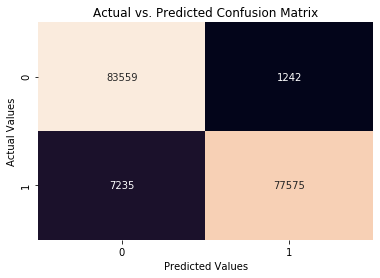

In [152]:
conf_mat = confusion_matrix(y_test3,pred_xgbc)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

### Cross Validation

In [148]:
from sklearn import model_selection
kf=model_selection.KFold(n_splits=5,shuffle=True,random_state=0)
values=model_selection.cross_val_score(xgbc,X_sc_k,y_res,cv=kf,scoring='roc_auc')
print(values)
b_e=1-np.mean(values)
v_e=np.std(values,ddof=1)
print('Bias_error:',b_e)
print('VE:',v_e)
print("Accuracy: %0.2f (+/- %0.2f)" % (values.mean(), values.std() * 2))

[0.97510516 0.97444347 0.97389097 0.97470885 0.97309186]
Bias_error: 0.02575193727370295
VE: 0.0007825356521590705
Accuracy: 0.97 (+/- 0.00)


### ROC_AUC Curve

In [154]:
y_probas=xgbc.predict_proba(X_test3)

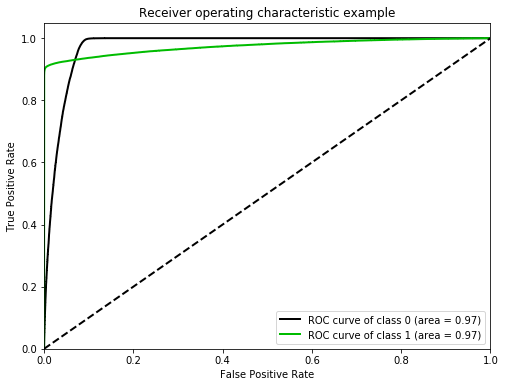

In [155]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_test3, y_probas,plot_macro=False,plot_micro=False,figsize=(8,6))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Box-plots

In [149]:
results=[[0.97050352, 0.96949795, 0.96883082, 0.97040282, 0.9684298 ],
        [0.97647807, 0.97591306, 0.97501687, 0.97632086, 0.97471726],
        [0.96245328, 0.96257487, 0.96085019, 0.96350985, 0.96087502],
        [0.9682385  ,0.96759655, 0.96617713, 0.96847877, 0.96602999],
        [0.96605913, 0.96523033, 0.96453051, 0.96653086, 0.96455301],
        [0.97509985, 0.97449464, 0.97372718 ,0.97484438, 0.97302458]]

In [150]:
names=['Logistic_Regression','Random Forest','Ada-boost','Gradient-Boost','Bagging','XGBC']

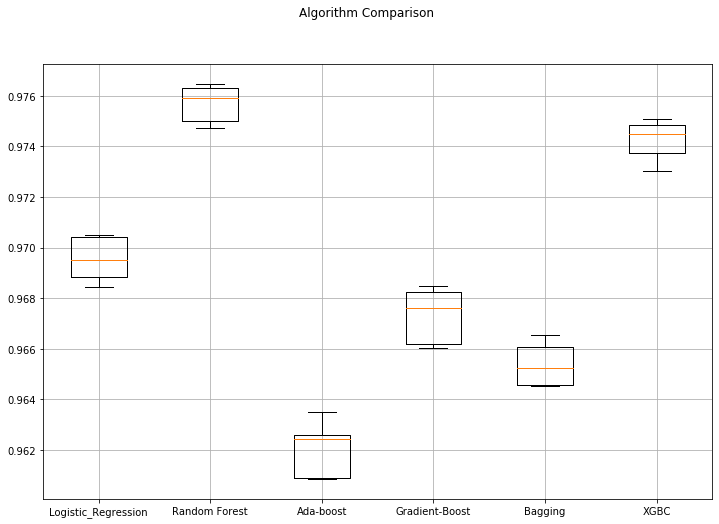

In [151]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.grid(True)
ax.set_xticklabels(names)
plt.show()